# Homework4 [Project] 
#### Data Science in Korea University, Prof. Jaewoo Kang
#### COSE471, Spring 2018
#### Due : 6/26 (Tues)  11:59 PM [NO LATE HAND IN(Late hand in will get 0), because of school grade policy]

### In this assignment, you will design, implement, and evaluate the appropriate models for given data.
- __This is project assignment. We can not reply your questions about technical(code) issues.__
- __이번 과제는 프로젝트 과제입니다. 소스코드와 같은 기술적인 질문에는 답변 드릴 수 없습니다.__

<br>
<br>
*Perform the steps described below for each dataset(2 Project).*
>0. Preprocess; normalization, feature selection, etc.
>1. Model selection; characteristics of datasets need to be comprehended.
>2. Evaluation; This step should be done properly to prevent overfitting problem.
>3. Enhancement; parameter tuning and feature selection, etc.

### When you make your model for this Project, you should use scikit learn. Don't use other ML package.
### Of course you can use any packages for handling your data. (pandas, numpy, matplotlib, random etc.)
### Download your data in *https://www.dropbox.com/sh/6s4e0z9fhenfw6z/AADkJO3Z6WN1b8IJhkVp9KgDa?dl=0*

## Project 1
### h1b data [h1b_train, h1b_dev, h1b_test]

- Use h1b __train data__ for train your model.
- Tune your model with __dev data__.
- Finally check your best performed model score with __test data__.
- __*You should clean your train dev test data first!!*__
- Score function : Accuracy
<br>
<br>
- __Your goal is to predict CASE_STATUS, using other features.__
- You can choose the features you want to use in your project.

### Attribute Information

- __CASE_STATUS__
    - The CASE_STATUS field denotes the status of the application after LCA processing. Certified applications are filed with USCIS for H-1B approval.
<br>
<br>
- EMPLOYER_NAME
    - Name of the employer submitting labor condition application.
<br>
<br>
- SOC_NAME
    - Occupational name associated with the SOC_CODE. SOC_CODE is the occupational code associated with the job being requested for temporary labor condition, as classified by the Standard Occupational Classification (SOC) System.
<br>
<br>
- JOB_TITLE
    - Title of the job.
<br>
<br>
- FULL_TIME_POSITION
    - Y = Full Time Position; N = Part Time Position.
<br>
<br>
- PREVAILING_WAGE
    - Prevailing Wage for the job being requested for temporary labor condition. The wage is listed at annual scale in USD. The prevailing wage for a job position is defined as the average wage paid to similarly employed workers in the requested occupation in the area of intended employment. The prevailing wage is based on the employer’s minimum requirements for the position.
<br>
<br>
- YEAR
    - Year in which the H-1B visa petition was filed.
<br>
<br>

In [1]:
#Data Cleaning
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

raw_train = pd.read_csv('h1b_train.csv')
raw_dev = pd.read_csv('h1b_dev.csv')
raw_test = pd.read_csv('h1b_test.csv')

def clean_dataset(raw_data):
    ##step 1: 불필요한 col 삭제
    raw_data=raw_data.iloc[:, 1:8]
    raw_data = raw_data.drop("JOB_TITLE", axis=1)
    raw_data = raw_data.drop("PREVAILING_WAGE", axis=1)
    h1b_col = list(raw_data)
    #################################################################
    ##step 2: NaN포함 row 삭제
    nan_index=[]

    colnum = 0
    for colnum in range(0, 4): #nan -> CASE_STATUS / EMPLOYER_NAME / SOC_NAME  / FULL_TIME_POSITION
        n=0
        for item in raw_data[h1b_col[colnum]]:
            if (type(item)==float):
                nan_index.append(n)
            n=n+1
            
    n=0 #nan ->  YEAR
    for item in raw_data['YEAR']:
        if (np.isnan(item)):
            nan_index.append(n)
        n=n+1

    nan_index = list(set(nan_index))
    nan_index.sort()
    #nan row 제거
    raw_data.drop(raw_data.index[nan_index], inplace=True)

    ###################################################################
    #Selected Features: YEAR / SOC_NAME / EMPLOYER_NAME / FULL_TIME_POSITION
    raw_data['CASE_STATUS'] = raw_data['CASE_STATUS'].str.replace("CERTIFIED-WITHDRAWN", "CERTIFIED")
    raw_data['CASE_STATUS'] = raw_data['CASE_STATUS'].str.replace("INVALIDATED", "DENIED")
    raw_data['CASE_STATUS'] = raw_data['CASE_STATUS'].str.replace("PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED", "DENIED")
    raw_data['CASE_STATUS'] = raw_data['CASE_STATUS'].str.replace("REJECTED", "DENIED")
    
    result_encoding = {'CERTIFIED':0, 'DENIED':1, 'WITHDRAWN': 2}
    raw_data["CASE_STATUS"] = raw_data["CASE_STATUS"].map(result_encoding)
    
    raw_data.loc[:,'SOC_NAME__'] = pd.Series(np.nan, index=raw_data.index)
    raw_data['SOC_NAME'] = raw_data['SOC_NAME'].str.lower()
    raw_data.SOC_NAME__[raw_data['SOC_NAME'].str.contains('computer','programmer')] = 'computer occupations'
    raw_data.SOC_NAME__[raw_data['SOC_NAME'].str.contains('software','web developer')] = 'computer occupations'
    raw_data.SOC_NAME__[raw_data['SOC_NAME'].str.contains('database')] = 'computer occupations'
    raw_data.SOC_NAME__[raw_data['SOC_NAME'].str.contains('math','statistic')] = 'Mathematical Occupations'
    raw_data.SOC_NAME__[raw_data['SOC_NAME'].str.contains('predictive model','stats')] = 'Mathematical Occupations'
    raw_data.SOC_NAME__[raw_data['SOC_NAME'].str.contains('teacher','linguist')] = 'Education Occupations'
    raw_data.SOC_NAME__[raw_data['SOC_NAME'].str.contains('professor','Teach')] = 'Education Occupations'
    raw_data.SOC_NAME__[raw_data['SOC_NAME'].str.contains('school principal')] = 'Education Occupations'
    raw_data.SOC_NAME__[raw_data['SOC_NAME'].str.contains('medical','doctor')] = 'Medical Occupations'
    raw_data.SOC_NAME__[raw_data['SOC_NAME'].str.contains('physician','dentist')] = 'Medical Occupations'
    raw_data.SOC_NAME__[raw_data['SOC_NAME'].str.contains('Health','Physical Therapists')] = 'Medical Occupations'
    raw_data.SOC_NAME__[raw_data['SOC_NAME'].str.contains('surgeon','nurse')] = 'Medical Occupations'
    raw_data.SOC_NAME__[raw_data['SOC_NAME'].str.contains('psychiatr')] = 'Medical Occupations'
    raw_data.SOC_NAME__[raw_data['SOC_NAME'].str.contains('chemist','physicist')] = 'Advance Sciences'
    raw_data.SOC_NAME__[raw_data['SOC_NAME'].str.contains('biology','scientist')] = 'Advance Sciences'
    raw_data.SOC_NAME__[raw_data['SOC_NAME'].str.contains('biologi','clinical research')] = 'Advance Sciences'
    raw_data.SOC_NAME__[raw_data['SOC_NAME'].str.contains('public relation','manage')] = 'Management Occupation'
    raw_data.SOC_NAME__[raw_data['SOC_NAME'].str.contains('management','operation')] = 'Management Occupation'
    raw_data.SOC_NAME__[raw_data['SOC_NAME'].str.contains('chief','plan')] = 'Management Occupation'
    raw_data.SOC_NAME__[raw_data['SOC_NAME'].str.contains('executive')] = 'Management Occupation'
    raw_data.SOC_NAME__[raw_data['SOC_NAME'].str.contains('advertis','marketing')] = 'Marketing Occupation'
    raw_data.SOC_NAME__[raw_data['SOC_NAME'].str.contains('promotion','market research')] = 'Marketing Occupation'
    raw_data.SOC_NAME__[raw_data['SOC_NAME'].str.contains('business','business analyst')] = 'Business Occupation'
    raw_data.SOC_NAME__[raw_data['SOC_NAME'].str.contains('business systems analyst')] = 'Business Occupation'
    raw_data.SOC_NAME__[raw_data['SOC_NAME'].str.contains('accountant','finance')] = 'Financial Occupation'
    raw_data.SOC_NAME__[raw_data['SOC_NAME'].str.contains('financial')] = 'Financial Occupation'
    raw_data.SOC_NAME__[raw_data['SOC_NAME'].str.contains('engineer','architect')] = 'Architecture & Engineering'
    raw_data.SOC_NAME__[raw_data['SOC_NAME'].str.contains('surveyor','carto')] = 'Architecture & Engineering'
    raw_data.SOC_NAME__[raw_data['SOC_NAME'].str.contains('technician','drafter')] = 'Architecture & Engineering'
    raw_data.SOC_NAME__[raw_data['SOC_NAME'].str.contains('information security','information tech')] = 'Architecture & Engineering'
    raw_data['SOC_NAME__']= raw_data.SOC_NAME__.replace(np.nan, 'Others', regex=True)

    raw_data.loc[:,'EMPLOYER_NAME__'] = pd.Series(np.nan, index=raw_data.index)
    raw_data['EMPLOYER_NAME'] = raw_data['EMPLOYER_NAME'].str.upper()
    raw_data.EMPLOYER_NAME__[raw_data['EMPLOYER_NAME'].str.contains('UNIVERSITY')] = 'University'
    raw_data['EMPLOYER_NAME__']= raw_data.EMPLOYER_NAME__.replace(np.nan, 'Non-University', regex=True)

    raw_data.YEAR = raw_data.YEAR.astype(np.int64)

    ######################################################################
    raw_data = raw_data.drop("EMPLOYER_NAME", axis=1)
    raw_data = raw_data.drop("SOC_NAME", axis=1)
    
    raw_data.rename(columns={'EMPLOYER_NAME__': 'EMPLOYER_NAME', 'SOC_NAME__': 'SOC_NAME'}, inplace=True)
    
    raw_data[['CASE_STATUS', 'FULL_TIME_POSITION', 'YEAR', 'SOC_NAME', 'EMPLOYER_NAME']] = raw_data[['CASE_STATUS', 'FULL_TIME_POSITION', 'YEAR', 'SOC_NAME', 'EMPLOYER_NAME']].apply(lambda x: x.astype('category'))

    x_data = raw_data.drop("CASE_STATUS", axis=1)
    y_data = raw_data.CASE_STATUS

    return x_data, y_data

x_train, y_train = clean_dataset(raw_train)
x_dev, y_dev = clean_dataset(raw_dev)
x_test, y_test = clean_dataset(raw_test)

In [2]:
x_trainset = pd.concat([x_train, x_dev])
y_trainset = pd.concat([y_train, y_dev])

x_trainset_encode = pd.get_dummies(x_trainset)
x_test_encode = pd.get_dummies(x_test)

x_trainset_encode.head()
x_test_encode.head()

,FULL_TIME_POSITION_N,FULL_TIME_POSITION_Y,YEAR_2011,YEAR_2012,YEAR_2013,YEAR_2014,YEAR_2015,YEAR_2016,SOC_NAME_Advance Sciences,SOC_NAME_Architecture & Engineering,...,SOC_NAME_Education Occupations,SOC_NAME_Financial Occupation,SOC_NAME_Management Occupation,SOC_NAME_Marketing Occupation,SOC_NAME_Mathematical Occupations,SOC_NAME_Medical Occupations,SOC_NAME_Others,SOC_NAME_computer occupations,EMPLOYER_NAME_Non-University,EMPLOYER_NAME_University
0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0


In [3]:
#from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

model = MultinomialNB()
param_range = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}
gs = GridSearchCV(estimator=model, param_grid=param_range, scoring='accuracy', cv=5, n_jobs=1)
gs.fit(x_trainset_encode, y_trainset)

print(gs.cv_results_["mean_test_score"])
print ("best parameter",gs.best_params_)

[0.93864641 0.93864641 0.93864641 0.93864641 0.93864641 0.93864641
 0.93864641 0.93850028]
best parameter {'alpha': 0.0001}


In [4]:
score = gs.score(x_test_encode, y_test)
print ("Model Accuracy: %f" % score)

Model Accuracy: 0.938918


## Project 2
### AAAI Accepted Papers

- Cluster papers using AAAI Accepted Papers data [use __'title'__ as primary key].
- Visualize your clustering result and explain it.
<br>
<br>
- __Your goal is to show clustering result with AAAI Accepted Papers.__
- __You must use 'abstract' feature.__ 
- You can choose the features you want to use in your project.

### Attribute Information

- __Title__
    - Free text; title of the paper 
<br>
<br>
- Groups
    - Categorical; author-selected, high-level keyword(s) 
<br>
<br>
- Keywords
    - Free text; author-generated keywords 
<br>
<br>
- Topics
    - Free text; author-selected, low-level keywords 
<br>
<br>
- __Abstracts__
    - Free text; paper abstracts

In [5]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

raw_aaai = pd.read_csv('AAAI_Accepted_Papers.csv', encoding="ISO-8859-1", index_col="title")
primary_key = raw_aaai.index

#Selected Features: abstract + keywords
raw_aaai['abstract'] = raw_aaai['abstract'].str.replace("\n", " ")
raw_aaai['keywords'] = raw_aaai['keywords'].str.replace("\n", " ")
raw_aaai['groups'] = raw_aaai['groups'].str.replace("\n", " ")

raw_aaai["temp"] = raw_aaai["keywords"].map(str ) + " " + raw_aaai["groups"]
raw_aaai["feature"] = raw_aaai["temp"].map(str ) + " " + raw_aaai["abstract"]

#TF-IDF
vectorizer = TfidfVectorizer(analyzer="word", use_idf=True, smooth_idf=True, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(raw_aaai['feature'])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names(), index=primary_key)

res = pd.concat([raw_aaai, tfidf_df], axis=1)
res = res.drop("groups", axis=1)
res = res.drop("keywords", axis=1)
res = res.drop("topics", axis=1)
res = res.drop("abstract", axis=1)
res = res.drop("temp", axis=1)

res.head()

,feature,000,05,06,07,10,100,1000,10kwh,10x,...,yielded,yielding,yields,york,yse,zeitgeist,zero,zilberstein,zurich,îµ
title,,,,,,,,,,,,,,,,,,,,,
The cascade auction ??a mechanism for deterring collusion in auctions,Multiagent Systems Mediators Auctions Collusio...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Basis Adaptation for Sparse Nonlinear Reinforcement Learning,Machine Learning Reasoning under Uncertainty R...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Optimal Coalition Structures in Cooperative Graph Games,Multiagent Systems Cooperative Game Theory Coa...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
External Memory Best-First Search for Multiple Sequence Alignment,Heuristic Search and Optimization External-Mem...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Posted Prices Exchange for Display Advertising Contracts,Multiagent Systems Display Advertising Dynamic...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
k_value = 3
max_iterations = 300

clustering_model = KMeans(
    n_clusters=k_value,
    max_iter=max_iterations,
    precompute_distances="auto",
    n_jobs=-1
)

labels = clustering_model.fit_predict(tfidf_df)

predict = pd.DataFrame(clustering_model.predict(tfidf_df), index=primary_key)
predict.columns=['predict']

r = pd.concat([res,predict],axis=1)
r.head()

,feature,000,05,06,07,10,100,1000,10kwh,10x,...,yielding,yields,york,yse,zeitgeist,zero,zilberstein,zurich,îµ,predict
title,,,,,,,,,,,,,,,,,,,,,
The cascade auction ??a mechanism for deterring collusion in auctions,Multiagent Systems Mediators Auctions Collusio...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
Basis Adaptation for Sparse Nonlinear Reinforcement Learning,Machine Learning Reasoning under Uncertainty R...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
Optimal Coalition Structures in Cooperative Graph Games,Multiagent Systems Cooperative Game Theory Coa...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
External Memory Best-First Search for Multiple Sequence Alignment,Heuristic Search and Optimization External-Mem...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Posted Prices Exchange for Display Advertising Contracts,Multiagent Systems Display Advertising Dynamic...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [7]:
#Visualization: feature reduction (PCA)
color_map = ['#20b2aa', '#ff7373', '#005073', '#da8c49', '#ffff66', '#1b9e77', '#7d6363', '#912727', '#d95f02', '#7570b3']
pca_num = 2

__tfidf = tfidf_matrix.todense()
reduced_feature = PCA(n_components=pca_num).fit_transform(__tfidf)

def visualize_cluster(k_value, labels):
    fig, ax = plt.subplots()
    for index, instance in enumerate(reduced_feature):
        color_map__ = color_map[0:k_value]
        pca_axis_1, pca_axis_2 = reduced_feature[index]
        color = color_map__[labels[index]]
        ax.scatter(pca_axis_1, pca_axis_2, c=color)
    plt.title("k value: "+ str(k_value))
    plt.show()

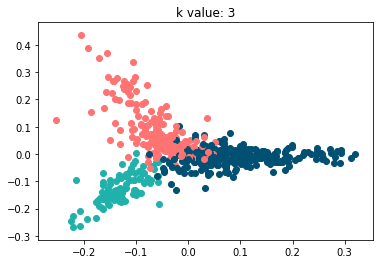

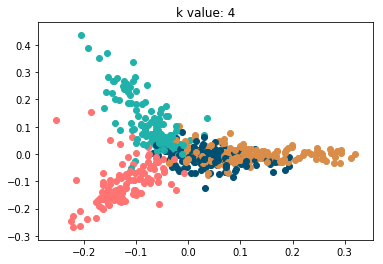

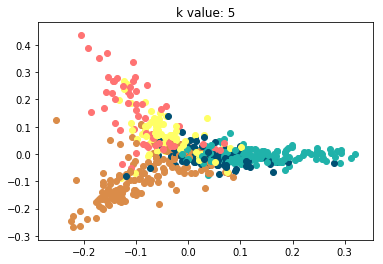

In [8]:
for k_value in range (3, 6):
    max_iterations = 300
    clustering_model = KMeans(
        n_clusters=k_value,
        max_iter=max_iterations,
        precompute_distances="auto",
        n_jobs=-1
    )
    labels = clustering_model.fit_predict(tfidf_df)
    
    visualize_cluster(k_value, labels)

+ feature로 사용한 column은 groups, keywords와 abstract(must use)이다.
+ 세 column의 텍스트를 합쳐 새로운 column **"feature"** 에 넣고 이 column을 이용해 TF-IDF matrix를 만들었다.
+ K-Means slustering model을 사용하였다.
+ elbow method를 이용해 가장 적절한 k 값을 찾으려 했으나 그래프 결과가 linear한 형태라서 적합한 값을 찾기 힘들었다.
+ k value를 2~10까지 바꿔가며 visualize했을 때 그나마 cluster의 경계가 뚜렷한 것이 3,4,5였고 각각의 그래프를 출력했다.


# FIN
## You did a really good job for the short semester. Have a nice vacation!! :) 